<a href="https://colab.research.google.com/github/Douglas-Wilian/Topicos-em-IA/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESENVOLVIMENTO DO ALGORITMO KNN
---

Aplicação do algoritimo K-Nearest Neighbors na base de dados Wine.

Discente: Douglas Wilian Lima Silva

Disciplina: Tópicos Especiais em Inteligência Artificial

Docente: José Alfredo

###PARTE I

In [1]:
#Carregamento das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Carregamento da base de dados

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Ajustando os nomes das colunas
column_names = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280_OD315_of_diluted_wines',
    'Proline'
]

df = pd.read_csv(url, names = column_names)

display(df)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
#Para a normalização dos dados podemos usar o método do Z-Score disponível na Scikit Learn

from sklearn.preprocessing import MinMaxScaler

Zscore = MinMaxScaler()

#Dataframe normalizado
dfn = pd.DataFrame(Zscore.fit_transform(df), columns = df.columns)

display(dfn)

#Observamos que o método normalizou as colunas das classes, vamos resolver

dfn['Class'] = df['Class']

display(dfn)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [84]:
# Separação das classes de desenvolvimento e teste

indices = np.random.permutation(dfn.shape[0])
div = int(0.6*len(indices))
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = dfn.loc[desen_id,:], dfn.loc[test_id,:]

y_d = cj_desen['Class']
y_t = cj_test['Class']
del cj_desen['Class']
del cj_test['Class']

display(cj_desen)
display(cj_test)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
26,0.621053,0.203557,0.673797,0.283505,0.250000,0.644828,0.548523,0.396226,0.328076,0.300341,0.357724,0.714286,0.654066
141,0.613158,0.359684,0.529412,0.484536,0.206522,0.144828,0.033755,0.452830,0.072555,0.368601,0.178862,0.439560,0.358060
99,0.331579,0.480237,0.454545,0.381443,0.195652,0.644828,0.559072,0.603774,0.757098,0.087031,0.764228,0.571429,0.091298
129,0.265789,0.703557,0.545455,0.587629,0.108696,0.386207,0.297468,0.547170,0.296530,0.112628,0.252033,0.476190,0.215407
88,0.160526,0.260870,0.588235,0.567010,0.152174,0.334483,0.284810,0.660377,0.296530,0.129693,0.422764,0.542125,0.286733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
69,0.310526,0.088933,0.208556,0.319588,0.880435,0.300000,0.198312,0.018868,0.659306,0.133959,0.650407,0.659341,0.313837
21,0.500000,0.604743,0.689840,0.412371,0.347826,0.493103,0.436709,0.226415,0.495268,0.274744,0.447154,0.824176,0.350927
63,0.352632,0.077075,0.427807,0.432990,0.184783,0.868966,0.582278,0.113208,0.460568,0.270478,0.601626,0.586081,0.101284


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
70,0.331579,0.171937,0.454545,0.505155,0.358696,0.041379,0.143460,0.452830,0.331230,0.151024,0.346341,0.201465,0.422254
46,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341
14,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136
150,0.650000,0.470356,0.673797,0.690722,0.576087,0.144828,0.259494,0.169811,0.264984,0.624573,0.089431,0.010989,0.158345
84,0.213158,0.029644,0.652406,0.381443,0.260870,0.420690,0.394515,0.169811,0.611987,0.151024,0.252033,0.663004,0.172611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.255263,0.152174,0.566845,0.587629,0.173913,0.162069,0.191983,0.698113,0.384858,0.197952,0.463415,0.505495,0.122682
97,0.331579,0.132411,0.331551,0.278351,0.163043,0.541379,0.455696,0.301887,0.429022,0.138225,0.609756,0.538462,0.106990
106,0.321053,0.195652,0.406417,0.432990,0.108696,0.231034,0.356540,0.452830,0.384858,0.180887,0.422764,0.695971,0.165478
61,0.423684,0.122530,0.352941,0.319588,0.326087,0.358621,0.225738,0.754717,0.066246,0.381399,0.406504,0.117216,0.122682


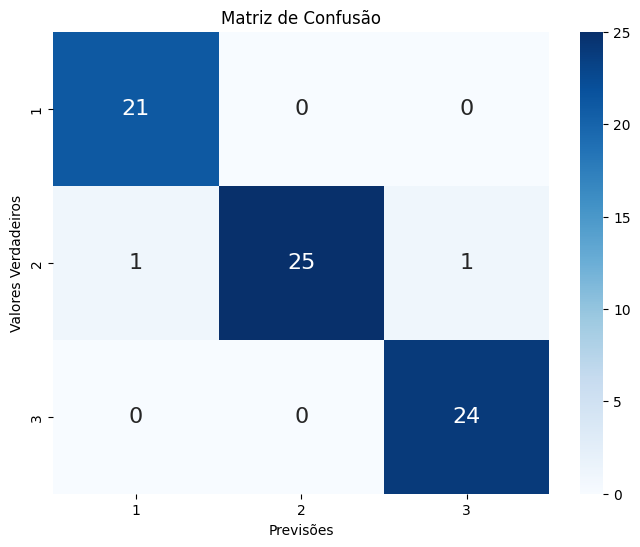

Acurácia do modelo: 0.97


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

def knn_classification(X_train, y_train, X_test, k=3):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    return y_pred

y_pred = knn_classification(cj_desen, y_d, cj_test, k=3)

# Calcule a matriz de confusão
cm = confusion_matrix(y_t, y_pred)
# Calcular a acurácia
accuracy = accuracy_score(y_t, y_pred)

# Crie um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

plt.gca().set_xticklabels([1, 2, 3])
plt.gca().set_yticklabels([1, 2, 3])
plt.show()


print(f'Acurácia do modelo: {accuracy:.2f}')

###PARTE II

In [89]:
media = 0
for n in range(10):
  indices = np.random.permutation(dfn.shape[0])
  div = int(0.2*len(indices))
  desen_id , test_id = indices[:div], indices[div:]
  cj_desen, cj_test = dfn.loc[desen_id,:], dfn.loc[test_id,:]
  y_d = cj_desen['Class']
  y_t = cj_test['Class']
  del cj_desen['Class']
  del cj_test['Class']

  y_pred = knn_classification(cj_desen, y_d, cj_test, k=10)
  media = media + accuracy_score(y_t, y_pred)

print(f'Média da acurácia dos 10 testes: {media/10}')

Média da acurácia dos 10 testes: 0.9258741258741259


In [97]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

p1 = [10, 20, 30, 40, 50]
k3 = [1, 3, 5, 7, 9]

vis = pd.DataFrame(columns=k3, index=p1)

for pc in p1:
    for k2 in k3:
        media1 = 0
        for n in range(10):
            indices = np.random.permutation(dfn.shape[0])
            div = int((pc / 100) * len(indices))

            desen_id, test_id = indices[:div], indices[div:]

            cj_desen, cj_test = dfn.loc[desen_id, :], dfn.loc[test_id, :]
            y_d = cj_desen['Class']
            y_t = cj_test['Class']
            del cj_desen['Class']
            del cj_test['Class']

            y_pred = knn_classification(cj_desen, y_d, cj_test, k=k2)
            media1 = media1 + accuracy_score(y_t, y_pred)

        vis.at[pc, k2] = media1 / 10

display(vis)



,1,3,5,7,9
10,0.923602,0.939752,0.809317,0.786957,0.668323
20,0.93007,0.934965,0.941259,0.952448,0.945455
30,0.9416,0.9592,0.9496,0.9592,0.9544
40,0.947664,0.951402,0.957944,0.956075,0.948598
50,0.944944,0.951685,0.951685,0.966292,0.969663
